In [37]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import quantstats as qs

In [38]:
with open('A2C_iter_1', 'rb') as f:
    A2C_iter_1 = pickle.load(f)

In [39]:
with open('A2C_iter_2', 'rb') as f:
    A2C_iter_2 = pickle.load(f)

In [40]:
with open('A2C_iter_3_good', 'rb') as f:
    A2C_iter_3 = pickle.load(f)

In [41]:
AUDUSD = pd.read_csv('../Datasets/AUDUSD_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')
EURUSD = pd.read_csv('../Datasets/EURUSD_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')
GBPUSD = pd.read_csv('../Datasets/GBPUSD_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')
NZDUSD = pd.read_csv('../Datasets/NZDUSD_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')
USDCAD = pd.read_csv('../Datasets/USDCAD_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')
USDCHF = pd.read_csv('../Datasets/USDCHF_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')
USDJPY = pd.read_csv('../Datasets/USDJPY_Candlestick_1_Hour_BID_01.01.2007-25.12.2021.csv')

In [42]:
# 1. Limpiamos el dataset ya que las fechas como vienen están mal
# 2. Asignamos el conjunto de entrenamiento y test de cada par de divisas. 
# El train va desde Junio 2019 a Junio 2021 y el test de Junio 2021 a Diciembre 2021

df_pair = {}
df_pair['AUDUSD'] = AUDUSD
df_pair['EURUSD'] = EURUSD
df_pair['GBPUSD'] = GBPUSD
df_pair['NZDUSD'] = NZDUSD
df_pair['USDCAD'] = USDCAD
df_pair['USDCHF'] = USDCHF
df_pair['USDJPY'] = USDJPY
df_train = {}
df_test = {}
names = list(df_pair.keys())
for i in range(len(df_pair)):
    df = df_pair[names[i]]
    df = df.drop(df[df.Volume == 0].index)
    df = df.rename(columns={'Gmt time': 'Date'})
    #AUDUSD['Date'] =  pd.to_times(AUDUSD['Date'])
    #AUDUSD.set_index('Date', inplace=True)

    df['Day'] = df['Date'].astype(str).str[0:2]
    df['Month'] = df['Date'].astype(str).str[3:5]
    df['Year'] = df['Date'].astype(str).str[6:10]
    df['Hour'] = df['Date'].astype(str).str[11:13]
    df['Date'] = pd.to_datetime(df[['Day', 'Month', 'Year', 'Hour']])
    df.set_index('Date', inplace=True)
    df = df[["Open","High","Low","Close","Volume"]]
    df_pair[names[i]] = df
    # Train
    df_train[names[i]] = df_pair[names[i]].query("20190630 < index < 20210701")
    # Test
    df_test[names[i]] = df_pair[names[i]].query("20210701 < index < 20211226")

### Análisis de resultados

In [43]:
policy = list(A2C_iter_1[names[0]].keys())

sharpe_iter_1 = {}
sharpe_iter_2 = {}
sharpe_iter_3 = {}

for i in range(len(names)):
    sharpe_iter_1[names[i]] = {}
    sharpe_iter_2[names[i]] = {}
    sharpe_iter_3[names[i]] = {}

for i in range(len(A2C_iter_1)):
    for j in range(len(policy)):
        sharpe_iter_1[names[i]][policy[j]] = qs.stats.sharpe(A2C_iter_1[names[i]][policy[j]])
        sharpe_iter_2[names[i]][policy[j]] = qs.stats.sharpe(A2C_iter_2[names[i]][policy[j]])
        sharpe_iter_3[names[i]][policy[j]] = qs.stats.sharpe(A2C_iter_3[names[i]][policy[j]])

C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\quantstats\stats.py:293: RuntimeWarning: invalid value encountered in double_scalars
  res = returns.mean() / divisor


In [44]:
help(qs.stats)

Help on module quantstats.stats in quantstats:

NAME
    quantstats.stats

DESCRIPTION
    # -*- coding: UTF-8 -*-
    #
    # QuantStats: Portfolio analytics for quants
    # https://github.com/ranaroussi/quantstats
    #
    # Copyright 2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    adjusted_sortino(returns, rf=0, periods=252, annualize=True, smart=False)
        Jack Schwager's version of the Sortino ratio allows f

In [ ]:
qs.stats.CumulativeReturn(A2C_iter_1[names[i]][policy[j]])

In [10]:
prueba = pd.DataFrame()
prueba['reward'] = list(A2C_iter_1[names[i]][policy[j]])
prueba['reward'] = prueba['reward']*10000

In [11]:
prueba

,reward
0,0.000000
1,0.000000
2,0.000000
3,21.433724
4,0.000000
...,...
2987,0.000000
2988,0.000000
2989,-0.376065
2990,0.000000


No handles with labels found to put in legend.


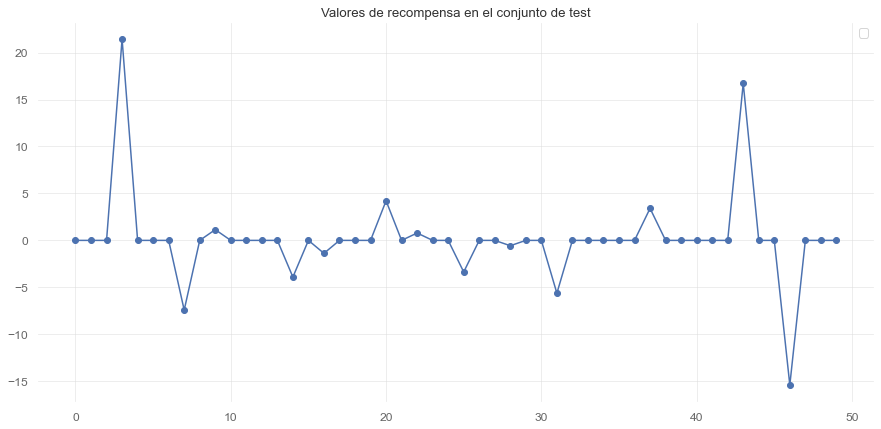

In [12]:
prueba = prueba.head(50)
plt.figure(figsize=(15, 7))


plt.plot(prueba["reward"],'-bo')
#plt.plot(genscape_curva["Storage_curva"], label = 'StorageAmount haciendo la media de los últimos 5 día')
plt.legend()
plt.title('Valores de recompensa en el conjunto de test')
plt.grid(True)
plt.show()

In [13]:
sharpe_iter_1

{'AUDUSD': {'A2C_MlpPolicy': -1.614968554880261,
  'A2C_MlpLstmPolicy': -0.2644162073393561,
  'A2C_MlpLnLstmPolicy': -1.1952360857881426},
 'EURUSD': {'A2C_MlpPolicy': -0.7400901574925068,
  'A2C_MlpLstmPolicy': 0.06082934864726783,
  'A2C_MlpLnLstmPolicy': 0.07262082175402762},
 'GBPUSD': {'A2C_MlpPolicy': -1.6615197800896042,
  'A2C_MlpLstmPolicy': 0.23120688491903638,
  'A2C_MlpLnLstmPolicy': 0.08354584346911506},
 'NZDUSD': {'A2C_MlpPolicy': -1.4025489613783522,
  'A2C_MlpLstmPolicy': -2.255456587516981,
  'A2C_MlpLnLstmPolicy': -0.9027062184674073},
 'USDCAD': {'A2C_MlpPolicy': -1.4518423522117627,
  'A2C_MlpLstmPolicy': -1.9056255567098233,
  'A2C_MlpLnLstmPolicy': -1.5258683570219387},
 'USDCHF': {'A2C_MlpPolicy': -2.6237189719572025,
  'A2C_MlpLstmPolicy': -1.988730117436805,
  'A2C_MlpLnLstmPolicy': -2.0725343004164998},
 'USDJPY': {'A2C_MlpPolicy': -0.19535557769169243,
  'A2C_MlpLstmPolicy': 0.10585222882584219,
  'A2C_MlpLnLstmPolicy': -0.39759985984387036}}

In [14]:
sharpe_iter_2

{'AUDUSD': {'A2C_MlpPolicy': -0.2632625750641165,
  'A2C_MlpLstmPolicy': 0.11751431411604382,
  'A2C_MlpLnLstmPolicy': 0.10098279453644861},
 'EURUSD': {'A2C_MlpPolicy': -1.9131188514674728,
  'A2C_MlpLstmPolicy': 0.3942134571738222,
  'A2C_MlpLnLstmPolicy': -2.1785268868508703},
 'GBPUSD': {'A2C_MlpPolicy': -0.22970415130000513,
  'A2C_MlpLstmPolicy': 0.21477272451673915,
  'A2C_MlpLnLstmPolicy': -1.0850301237514592},
 'NZDUSD': {'A2C_MlpPolicy': -0.756109270724894,
  'A2C_MlpLstmPolicy': 0.028908126263940893,
  'A2C_MlpLnLstmPolicy': -0.49721545313150606},
 'USDCAD': {'A2C_MlpPolicy': -1.9706508420018758,
  'A2C_MlpLstmPolicy': -1.1748604714542645,
  'A2C_MlpLnLstmPolicy': -0.5664605479871856},
 'USDCHF': {'A2C_MlpPolicy': -2.0533410751358825,
  'A2C_MlpLstmPolicy': -1.7513346635154332,
  'A2C_MlpLnLstmPolicy': -1.743068103175562},
 'USDJPY': {'A2C_MlpPolicy': -0.1299548744725268,
  'A2C_MlpLstmPolicy': -0.25269496174243145,
  'A2C_MlpLnLstmPolicy': -0.19569016232685393}}

In [15]:
sharpe_iter_3

{'AUDUSD': {'A2C_MlpPolicy': 0.19311926977458535,
  'A2C_MlpLstmPolicy': nan,
  'A2C_MlpLnLstmPolicy': -1.986955057128371},
 'EURUSD': {'A2C_MlpPolicy': 0.29021474623196064,
  'A2C_MlpLstmPolicy': -0.35316552287798664,
  'A2C_MlpLnLstmPolicy': nan},
 'GBPUSD': {'A2C_MlpPolicy': 0.29021474623196064,
  'A2C_MlpLstmPolicy': 0.31523991328636297,
  'A2C_MlpLnLstmPolicy': 0.29021474623196064},
 'NZDUSD': {'A2C_MlpPolicy': 0.2582670197294872,
  'A2C_MlpLstmPolicy': nan,
  'A2C_MlpLnLstmPolicy': nan},
 'USDCAD': {'A2C_MlpPolicy': 0.4086073950985399,
  'A2C_MlpLstmPolicy': -0.29021474623196053,
  'A2C_MlpLnLstmPolicy': -0.29021474623196053},
 'USDCHF': {'A2C_MlpPolicy': nan,
  'A2C_MlpLstmPolicy': -0.2902147462319606,
  'A2C_MlpLnLstmPolicy': -0.755625173760742},
 'USDJPY': {'A2C_MlpPolicy': -0.23183490859992711,
  'A2C_MlpLstmPolicy': -0.1948758951801042,
  'A2C_MlpLnLstmPolicy': -0.29021474623196064}}

In [16]:
sharpe_iter_3['USDCHF']['A2C_MlpPolicy'] = -10000

In [17]:
best_per_iter = {}

for i in range(len(names)):
    best_per_iter[names[i]] = {}
    
for i in range(len(names)):
    max_key = max(sharpe_iter_1[names[i]], key=sharpe_iter_1[names[i]].get)
    max_value = max(sharpe_iter_1[names[i]].values())
    best_per_iter[names[i]]['iter_1_'+max_key] = max_value
    
    max_key = max(sharpe_iter_2[names[i]], key=sharpe_iter_2[names[i]].get)
    max_value = max(sharpe_iter_2[names[i]].values())
    best_per_iter[names[i]]['iter_2_'+max_key] = max_value
    
    max_key = max(sharpe_iter_3[names[i]], key=sharpe_iter_3[names[i]].get)
    max_value = max(sharpe_iter_3[names[i]].values())
    best_per_iter[names[i]]['iter_3_'+max_key] = max_value

In [18]:
best_per_iter

{'AUDUSD': {'iter_1_A2C_MlpLstmPolicy': -0.2644162073393561,
  'iter_2_A2C_MlpLstmPolicy': 0.11751431411604382,
  'iter_3_A2C_MlpPolicy': 0.19311926977458535},
 'EURUSD': {'iter_1_A2C_MlpLnLstmPolicy': 0.07262082175402762,
  'iter_2_A2C_MlpLstmPolicy': 0.3942134571738222,
  'iter_3_A2C_MlpPolicy': 0.29021474623196064},
 'GBPUSD': {'iter_1_A2C_MlpLstmPolicy': 0.23120688491903638,
  'iter_2_A2C_MlpLstmPolicy': 0.21477272451673915,
  'iter_3_A2C_MlpLstmPolicy': 0.31523991328636297},
 'NZDUSD': {'iter_1_A2C_MlpLnLstmPolicy': -0.9027062184674073,
  'iter_2_A2C_MlpLstmPolicy': 0.028908126263940893,
  'iter_3_A2C_MlpPolicy': 0.2582670197294872},
 'USDCAD': {'iter_1_A2C_MlpPolicy': -1.4518423522117627,
  'iter_2_A2C_MlpLnLstmPolicy': -0.5664605479871856,
  'iter_3_A2C_MlpPolicy': 0.4086073950985399},
 'USDCHF': {'iter_1_A2C_MlpLstmPolicy': -1.988730117436805,
  'iter_2_A2C_MlpLnLstmPolicy': -1.743068103175562,
  'iter_3_A2C_MlpLstmPolicy': -0.2902147462319606},
 'USDJPY': {'iter_1_A2C_MlpLstmP

### ¿Se ha mejorado?

In [19]:
best_iter = {}

for i in range(len(names)):
    best_iter[names[i]] = {}

for i in range(len(names)):
    max_key = max(best_per_iter[names[i]], key=best_per_iter[names[i]].get)
    max_value = max(best_per_iter[names[i]].values())
    best_iter[names[i]][max_key] = max_value

In [20]:
best_iter

{'AUDUSD': {'iter_3_A2C_MlpPolicy': 0.19311926977458535},
 'EURUSD': {'iter_2_A2C_MlpLstmPolicy': 0.3942134571738222},
 'GBPUSD': {'iter_3_A2C_MlpLstmPolicy': 0.31523991328636297},
 'NZDUSD': {'iter_3_A2C_MlpPolicy': 0.2582670197294872},
 'USDCAD': {'iter_3_A2C_MlpPolicy': 0.4086073950985399},
 'USDCHF': {'iter_3_A2C_MlpLstmPolicy': -0.2902147462319606},
 'USDJPY': {'iter_1_A2C_MlpLstmPolicy': 0.10585222882584219}}

In [21]:
# Se ha mejorado en 5/7 pares, lo que supone un 71.% de los casos

### ¿Se ha ganado pasta en alguno?

In [22]:
# Creamos el diccionario de resultados del mejor en cada par de divisas
top_performance = {}
for i in range(len(names)):
    top_performance[names[i]] = {}
    
top_performance[names[0]]['iter_3_A2C_MlpPolicy'] = A2C_iter_3[names[0]]['A2C_MlpPolicy']
top_performance[names[1]]['iter_2_A2C_MlpLstmPolicy'] = A2C_iter_2[names[1]]['A2C_MlpLstmPolicy']
top_performance[names[2]]['iter_3_A2C_MlpLstmPolicy'] = A2C_iter_3[names[2]]['A2C_MlpLstmPolicy']
top_performance[names[3]]['iter_3_A2C_MlpPolicy'] = A2C_iter_3[names[3]]['A2C_MlpPolicy']
top_performance[names[4]]['iter_3_A2C_MlpPolicy'] = A2C_iter_3[names[4]]['A2C_MlpPolicy']
top_performance[names[5]]['iter_3_A2C_MlpLstmPolicy'] = A2C_iter_3[names[5]]['A2C_MlpLstmPolicy']
top_performance[names[6]]['iter_1_A2C_MlpLstmPolicy'] = A2C_iter_1[names[6]]['A2C_MlpLstmPolicy']

## AUDUSD

In [23]:
qs.reports.html(top_performance[names[0]]['iter_3_A2C_MlpPolicy'], output=names[0]+'iter_3_A2C_MlpPolicy.html')

                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          3.73%
CAGR﹪                     8.08%

Sharpe                     0.19
Smart Sharpe               0.19
Sortino                    0.42
Smart Sortino              0.42
Sortino/√2                 0.29
Smart Sortino/√2           0.29
Omega                      2.22

Max Drawdown               -2.85%
Longest DD Days            85
Volatility (ann.)          1.67%
Calmar                     2.84
Skew                       23.98
Kurtosis                   1281.75

Expected Daily %           0.0%
Expected Monthly %         0.61%
Expected Yearly %          3.73%
Kelly Criterion            22.01%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.17%
Expected Shortfall (cVaR)  -0.17%

Gain/Pain Ratio            1.22
Gain/Pain (1M)             1.22

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-09-30,2021-10-18,2021-12-24,85,-2.845642,-0.372637
2,2021-07-05,2021-07-05,2021-08-23,49,-0.274889,0.000000


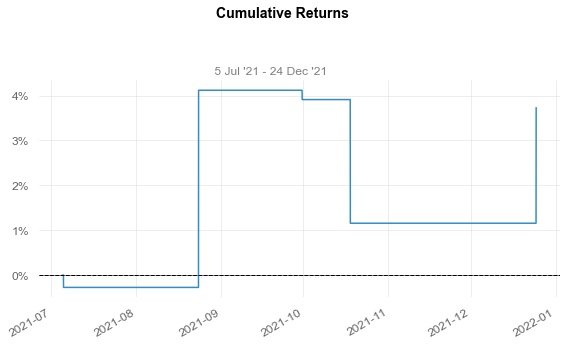

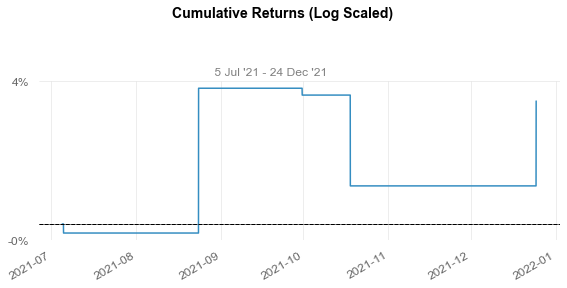

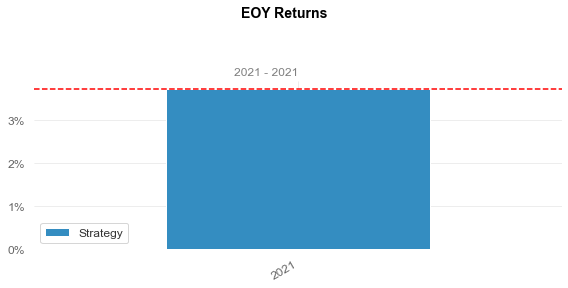

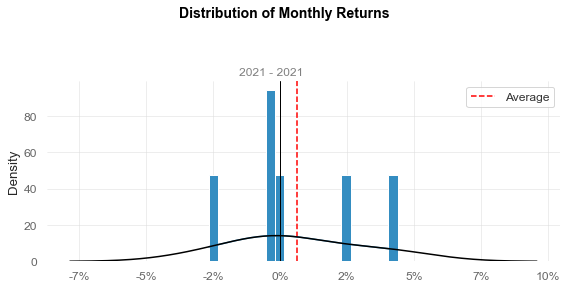

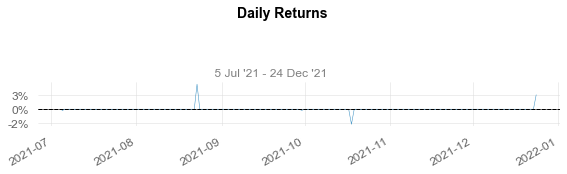

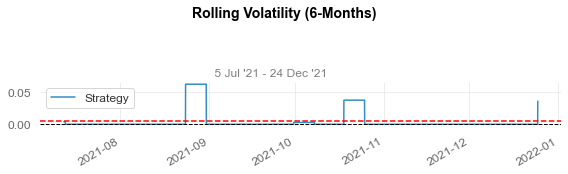

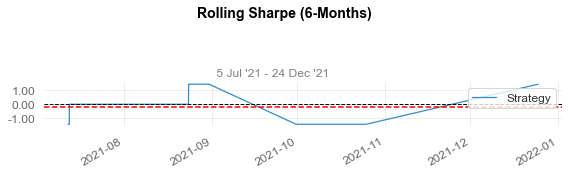

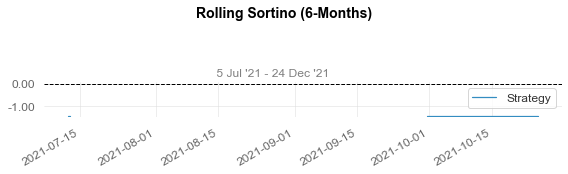

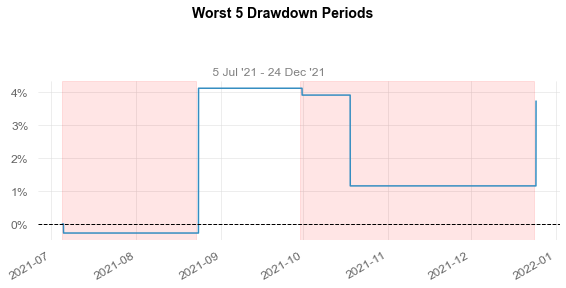

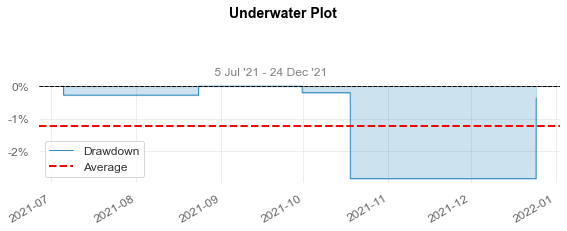

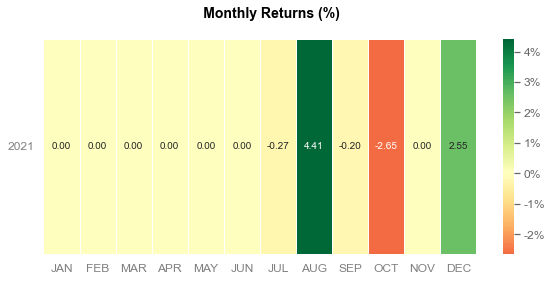

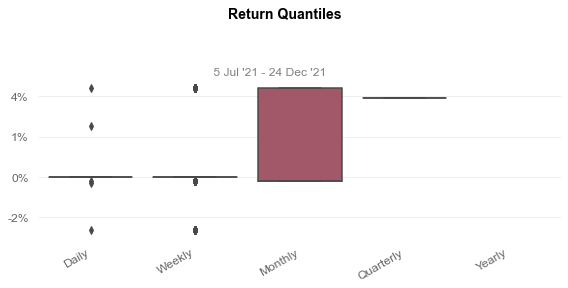

In [24]:
qs.reports.full(top_performance[names[0]]['iter_3_A2C_MlpPolicy'])

## EURUSD

In [25]:
qs.reports.html(top_performance[names[1]]['iter_2_A2C_MlpLstmPolicy'], output=names[1]+'_iter_2_A2C_MlpLstmPolicy.html')

                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          4.57%
CAGR﹪                     9.96%

Sharpe                     0.39
Smart Sharpe               0.39
Sortino                    1.09
Smart Sortino              1.09
Sortino/√2                 0.77
Smart Sortino/√2           0.77
Omega                      2.54

Max Drawdown               -0.96%
Longest DD Days            58
Volatility (ann.)          0.97%
Calmar                     10.4
Skew                       20.04
Kurtosis                   565.72

Expected Daily %           0.0%
Expected Monthly %         0.75%
Expected Yearly %          4.57%
Kelly Criterion            30.3%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.1%
Expected Shortfall (cVaR)  -0.1%

Gain/Pain Ratio            1.54
Gain/Pain (1M)             9.06

Pa

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-28,2021-12-24,2021-12-24,25,-0.957767,-0.631189
2,2021-07-12,2021-08-03,2021-08-26,44,-0.749747,-0.610085
3,2021-08-30,2021-08-31,2021-10-27,58,-0.525335,-0.410744
4,2021-07-06,2021-07-06,2021-07-07,1,-0.210548,0.000000


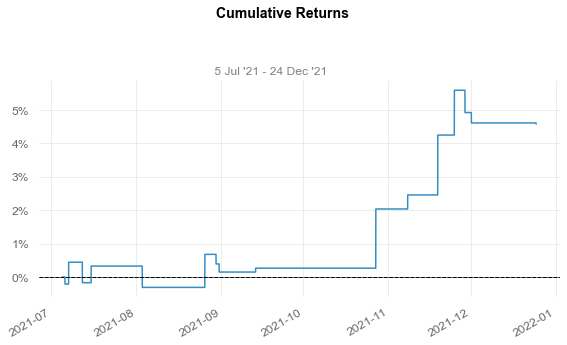

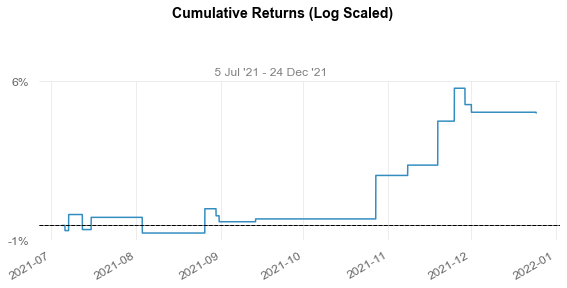

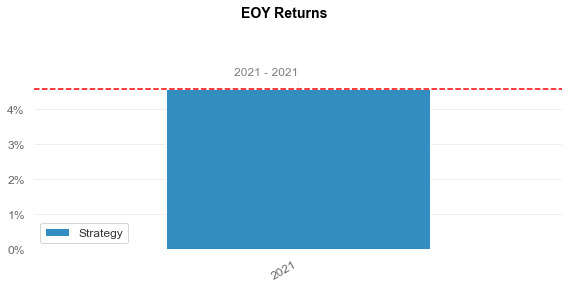

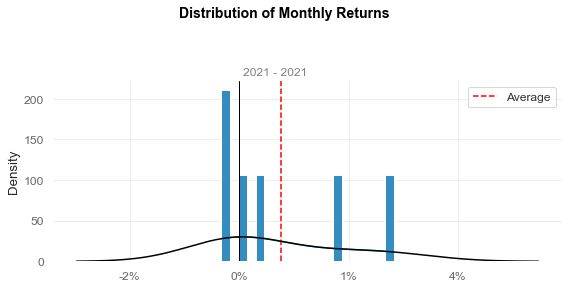

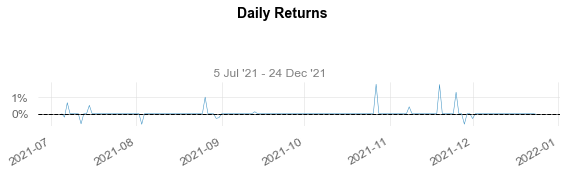

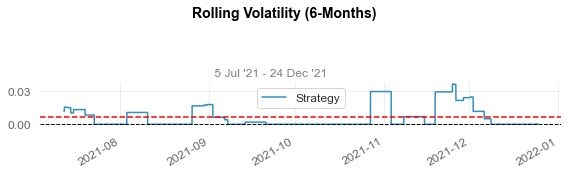

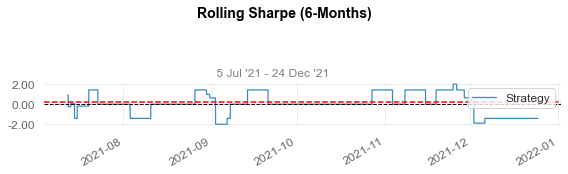

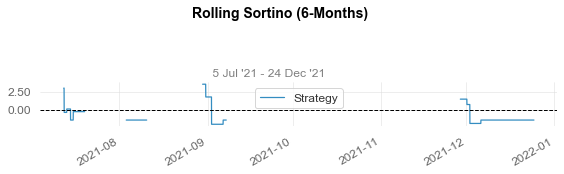

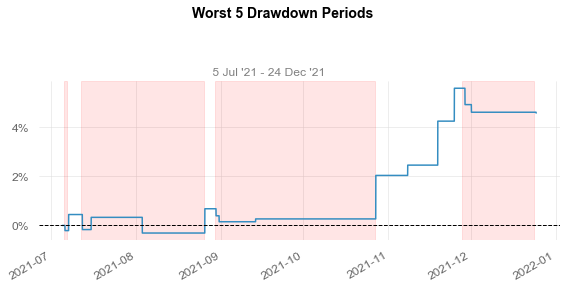

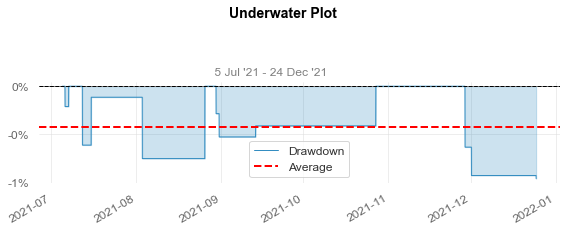

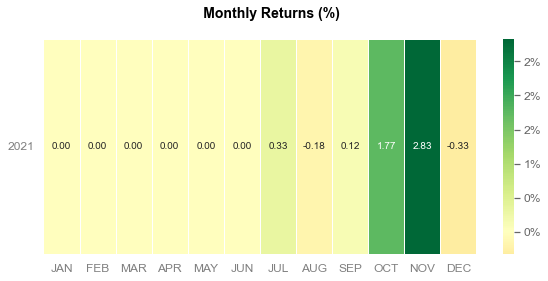

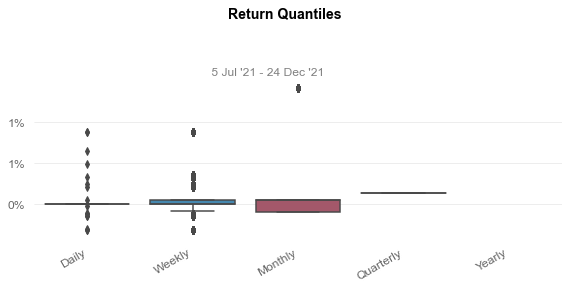

In [26]:
qs.reports.full(top_performance[names[1]]['iter_2_A2C_MlpLstmPolicy'])

## GBPUSD

In [27]:
qs.reports.html(top_performance[names[2]]['iter_3_A2C_MlpLstmPolicy'], output=names[2]+'iter_3_A2C_MlpLstmPolicy.html')

C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          3.26%
CAGR﹪                     7.05%

Sharpe                     0.32
Smart Sharpe               0.32
Sortino                    inf
Smart Sortino              inf
Sortino/√2                 inf
Smart Sortino/√2           inf
Omega                      nan

Max Drawdown               %
Longest DD Days            -
Volatility (ann.)          0.87%
Calmar                     inf
Skew                       54.07
Kurtosis                   2943.57

Expected Daily %           0.0%
Expected Monthly %         0.54%
Expected Yearly %          3.26%
Kelly Criterion            nan%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.09%
Expected Shortfall (cVaR)  -0.09%

Gain/Pain Ratio            inf
Gain/Pain (1M)             inf

Payoff Ratio  

C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


None

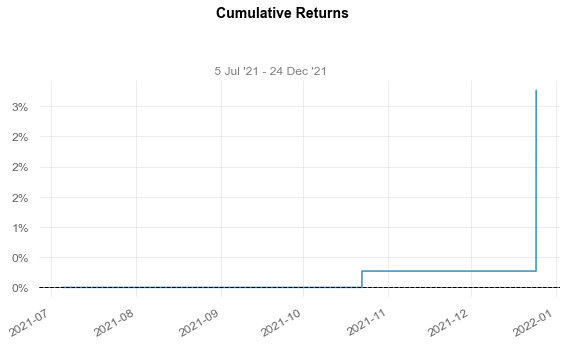

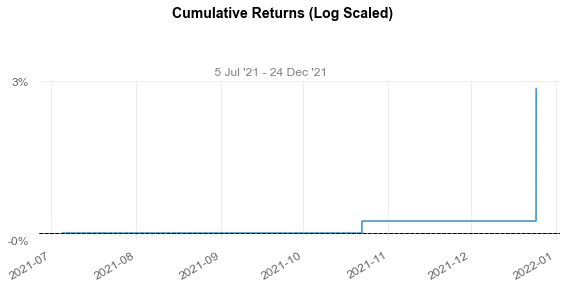

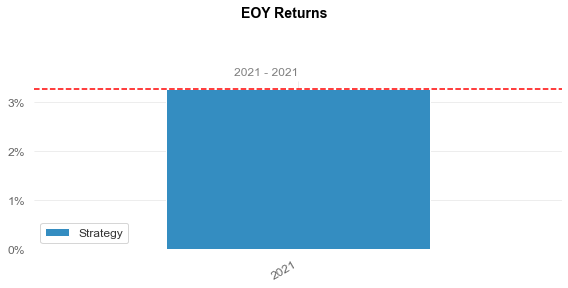

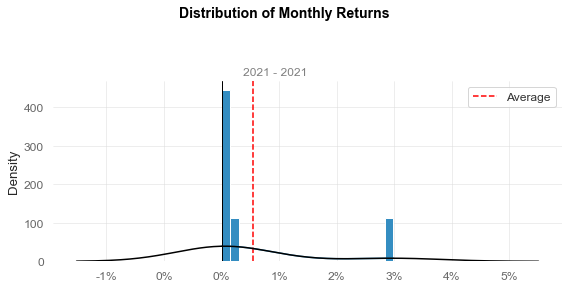

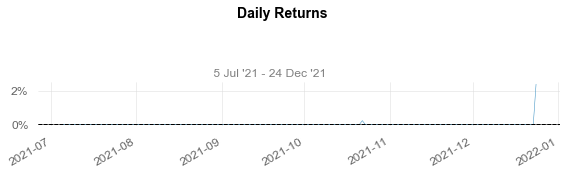

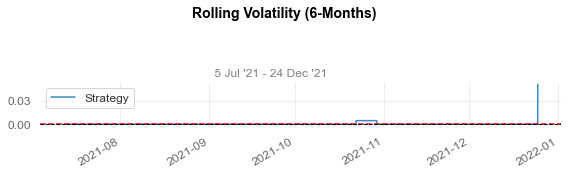

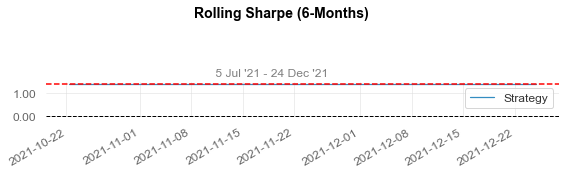

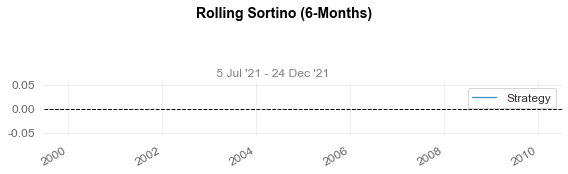

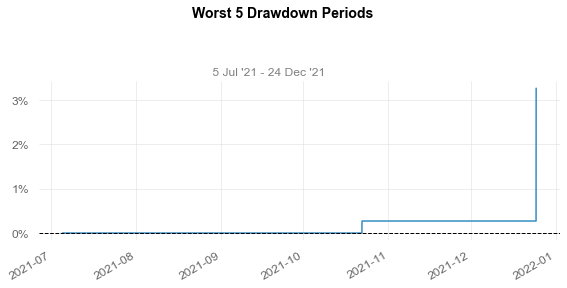

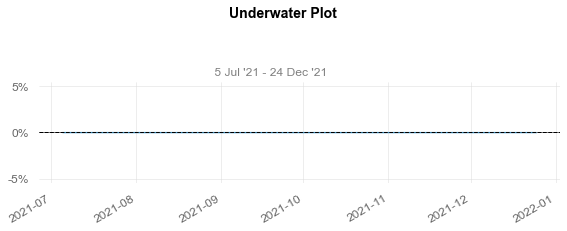

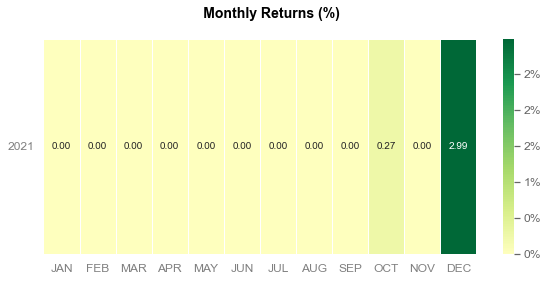

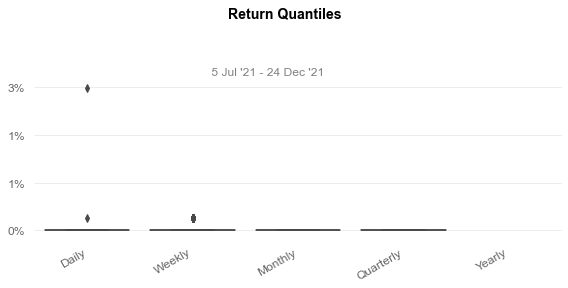

In [28]:
qs.reports.full(top_performance[names[2]]['iter_3_A2C_MlpLstmPolicy'])

## NZDUSD

In [29]:
qs.reports.html(top_performance[names[3]]['iter_3_A2C_MlpPolicy'], output=names[3]+'iter_3_A2C_MlpPolicy.html')

                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          3.11%
CAGR﹪                     6.71%

Sharpe                     0.26
Smart Sharpe               0.26
Sortino                    2.47
Smart Sortino              2.47
Sortino/√2                 1.75
Smart Sortino/√2           1.75
Omega                      9.51

Max Drawdown               -0.37%
Longest DD Days            131
Volatility (ann.)          1.02%
Calmar                     18.3
Skew                       53.74
Kurtosis                   2927.23

Expected Daily %           0.0%
Expected Monthly %         0.51%
Expected Yearly %          3.11%
Kelly Criterion            44.74%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.1%
Expected Shortfall (cVaR)  -0.1%

Gain/Pain Ratio            8.51
Gain/Pain (1M)             8.51


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-08-15,2021-08-15,2021-12-24,131,-0.366514,0.0


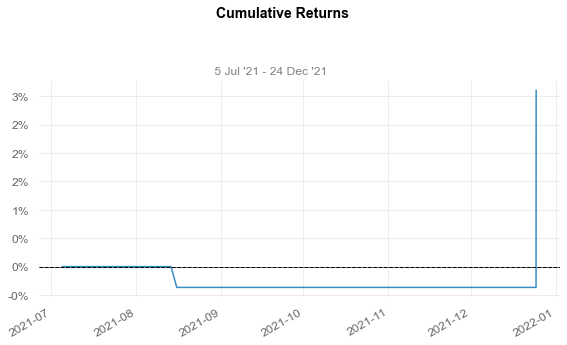

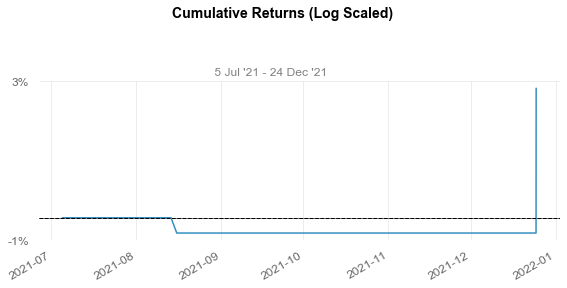

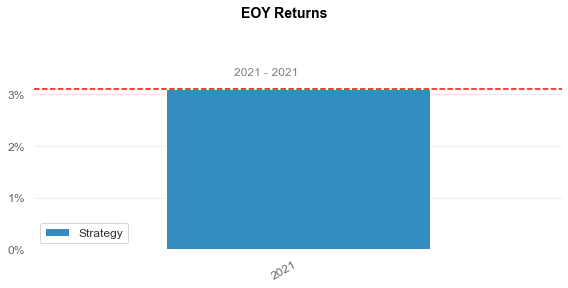

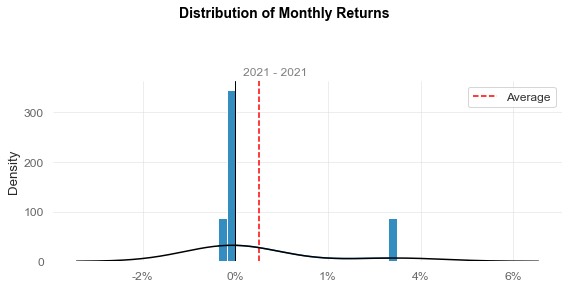

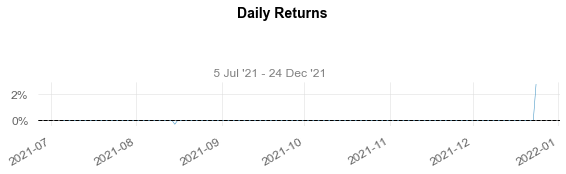

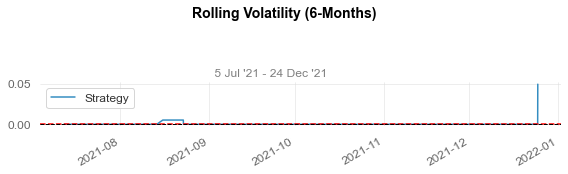

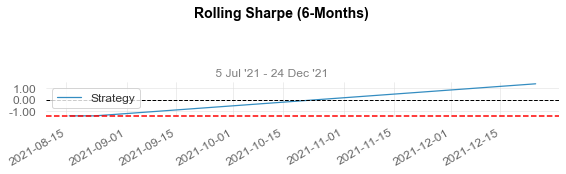

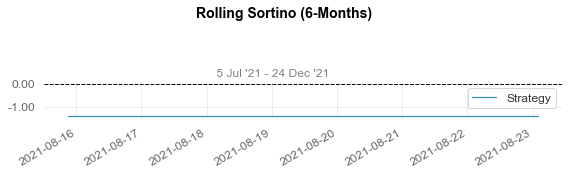

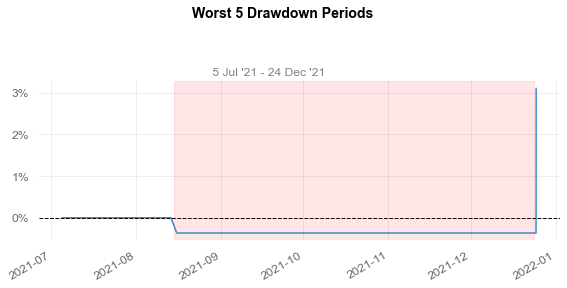

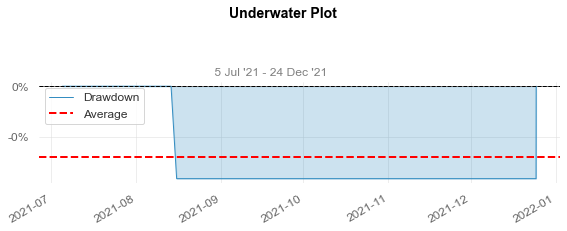

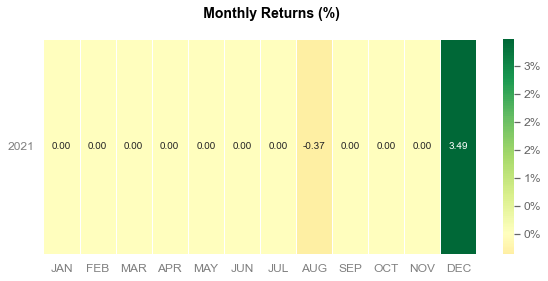

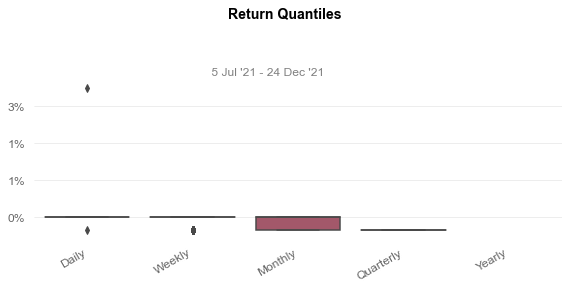

In [30]:
qs.reports.full(top_performance[names[3]]['iter_3_A2C_MlpPolicy'])

## USDCAD

In [31]:
qs.reports.html(top_performance[names[4]]['iter_3_A2C_MlpPolicy'], output=names[4]+'iter_3_A2C_MlpPolicy.html')

C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          0.11%
CAGR﹪                     0.24%

Sharpe                     0.41
Smart Sharpe               0.41
Sortino                    inf
Smart Sortino              inf
Sortino/√2                 inf
Smart Sortino/√2           inf
Omega                      nan

Max Drawdown               %
Longest DD Days            -
Volatility (ann.)          0.02%
Calmar                     inf
Skew                       39.19
Kurtosis                   1547.95

Expected Daily %           0.0%
Expected Monthly %         0.02%
Expected Yearly %          0.11%
Kelly Criterion            nan%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Gain/Pain Ratio            inf
Gain/Pain (1M)             inf

Payoff Ratio    

C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\Usuario\.conda\envs\TFM_RL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


None

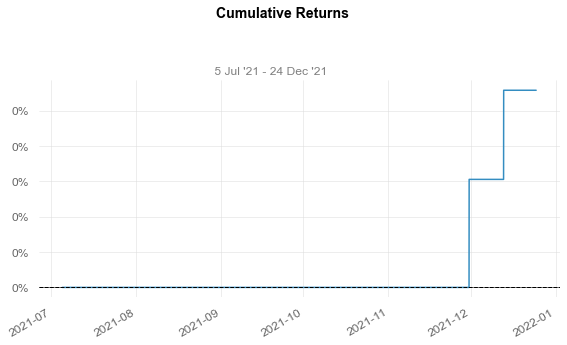

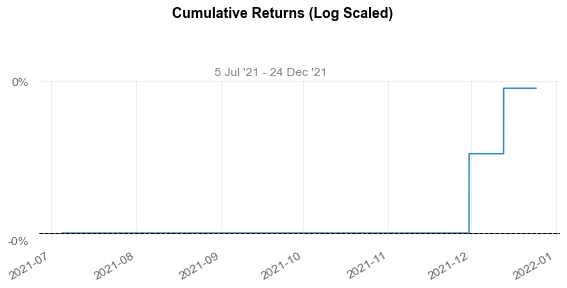

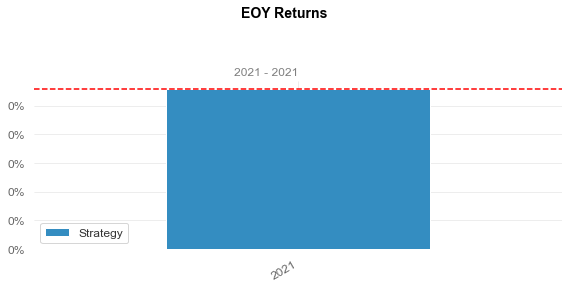

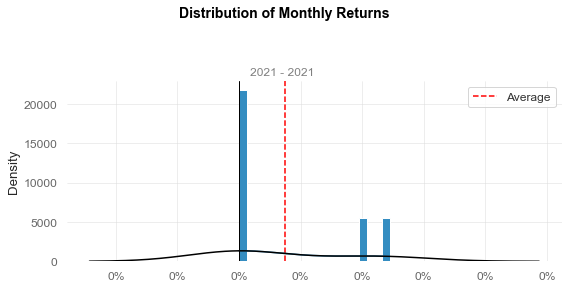

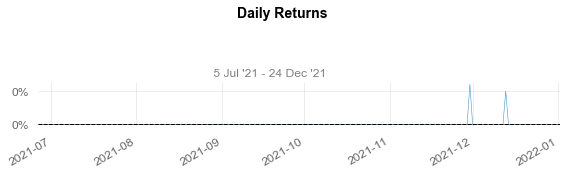

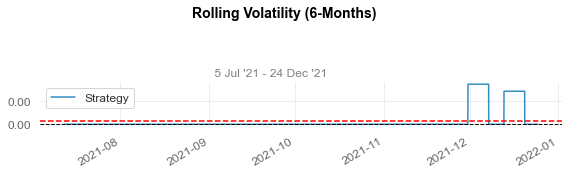

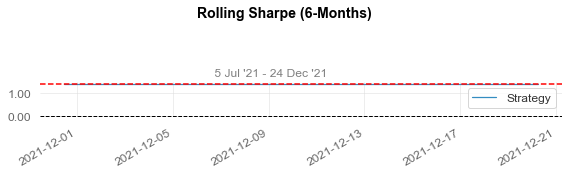

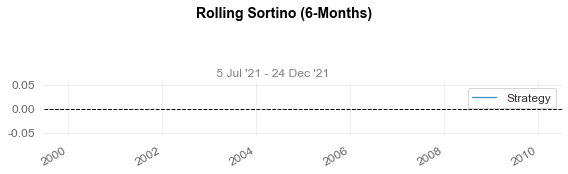

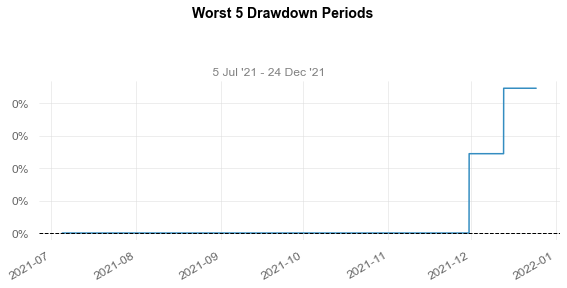

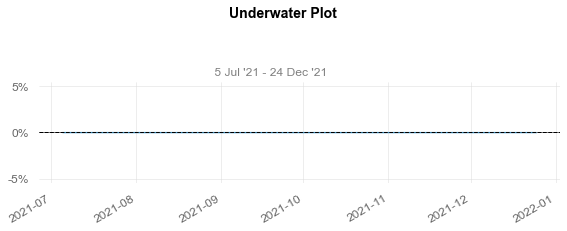

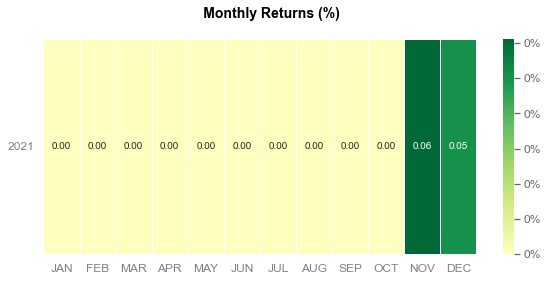

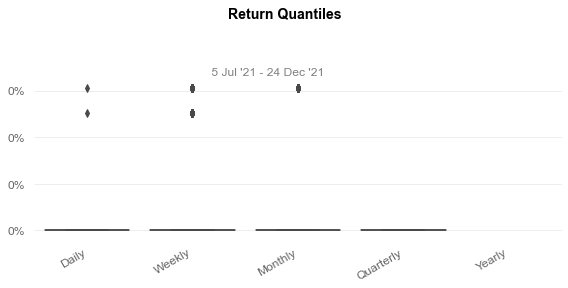

In [32]:
qs.reports.full(top_performance[names[4]]['iter_3_A2C_MlpPolicy'])

## USDCHF

In [33]:
qs.reports.html(top_performance[names[5]]['iter_3_A2C_MlpLstmPolicy'], output=names[5]+'iter_3_A2C_MlpLstmPolicy.html')

                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          -0.18%
CAGR﹪                     -0.39%

Sharpe                     -0.29
Smart Sharpe               -0.29
Sortino                    -0.29
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.0

Max Drawdown               -0.18%
Longest DD Days            18
Volatility (ann.)          0.05%
Calmar                     -2.12
Skew                       -54.7
Kurtosis                   2992.0

Expected Daily %           -0.0%
Expected Monthly %         -0.03%
Expected Yearly %          -0.18%
Kelly Criterion            nan%
Risk of Ruin               1.0%
Daily Value-at-Risk        -0.01%
Expected Shortfall (cVaR)  -0.01%

Gain/Pain Ratio            -1.0
Gain/Pain (1M)         

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-06,2021-12-06,2021-12-24,18,-0.181653,NaN


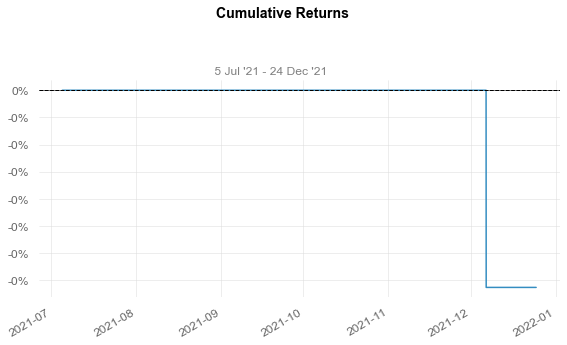

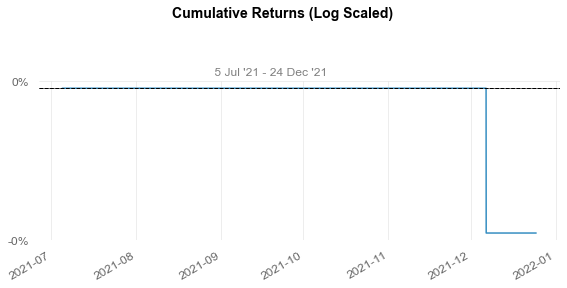

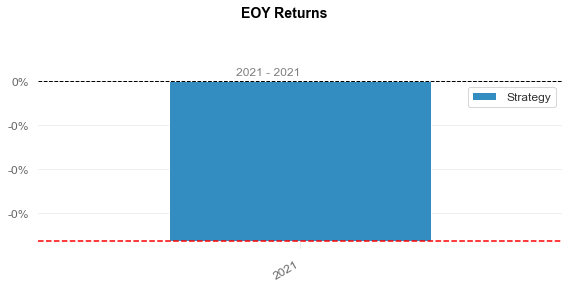

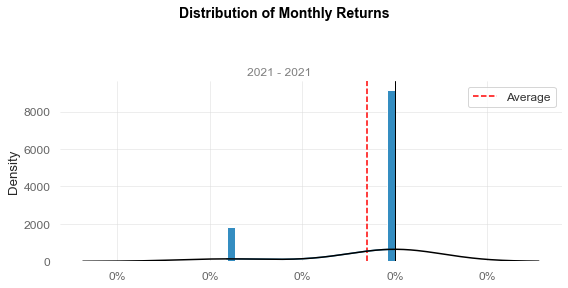

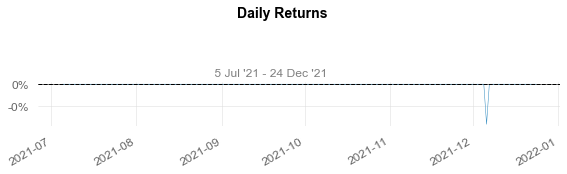

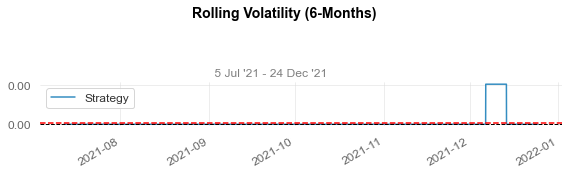

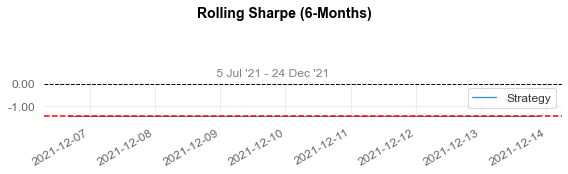

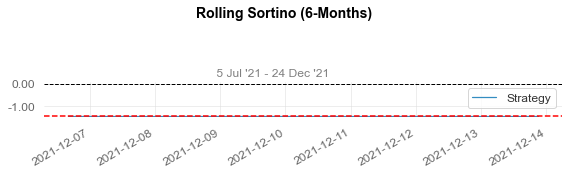

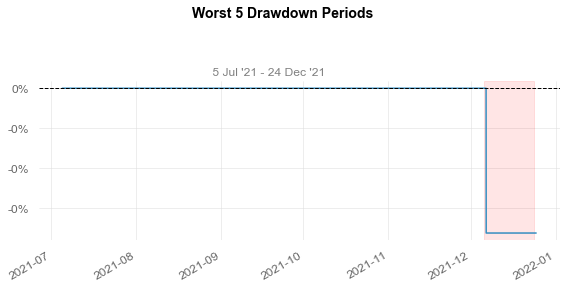

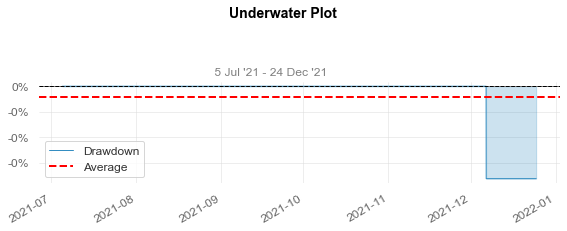

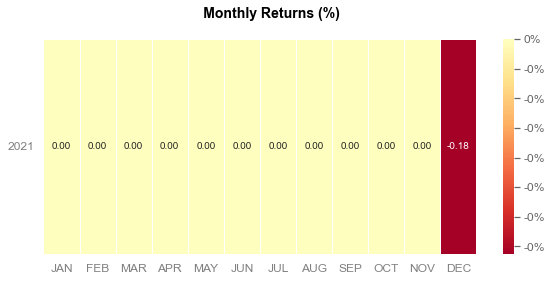

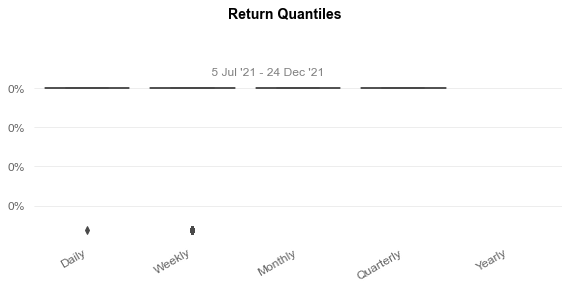

In [34]:
qs.reports.full(top_performance[names[5]]['iter_3_A2C_MlpLstmPolicy'])

## USDJPY

In [35]:
qs.reports.html(top_performance[names[6]]['iter_1_A2C_MlpLstmPolicy'], output=names[6]+'_iter_1_A2C_MlpLstmPolicy.html')

                           Strategy
-------------------------  ----------
Start Period               2021-07-05
End Period                 2021-12-24
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          1.01%
CAGR﹪                     2.15%

Sharpe                     0.11
Smart Sharpe               0.11
Sortino                    0.16
Smart Sortino              0.16
Sortino/√2                 0.11
Smart Sortino/√2           0.11
Omega                      1.04

Max Drawdown               -2.55%
Longest DD Days            158
Volatility (ann.)          0.83%
Calmar                     0.84
Skew                       0.34
Kurtosis                   40.12

Expected Daily %           0.0%
Expected Monthly %         0.17%
Expected Yearly %          1.01%
Kelly Criterion            2.02%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.09%
Expected Shortfall (cVaR)  -0.09%

Gain/Pain Ratio            0.08
Gain/Pain (1M)             0.56



None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-07-19,2021-10-19,2021-12-24,158,-2.553546,-2.452703
2,2021-07-13,2021-07-13,2021-07-15,1,-0.268116,-0.229782
3,2021-07-07,2021-07-07,2021-07-08,1,-0.144469,-0.111727
4,2021-07-09,2021-07-09,2021-07-12,3,-0.133861,-0.128831
5,2021-07-15,2021-07-16,2021-07-16,0,-0.108654,-0.063593


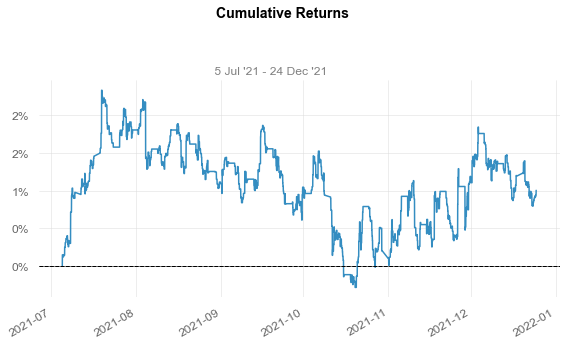

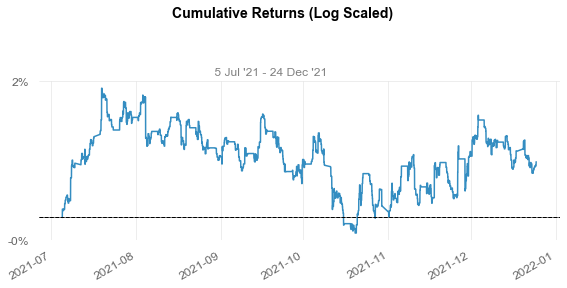

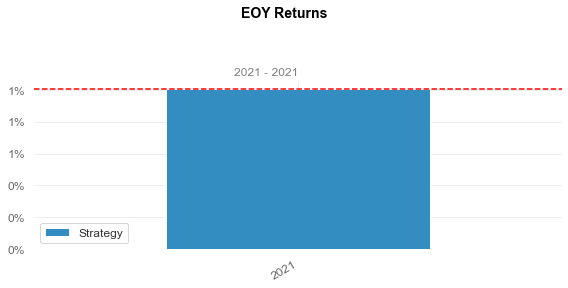

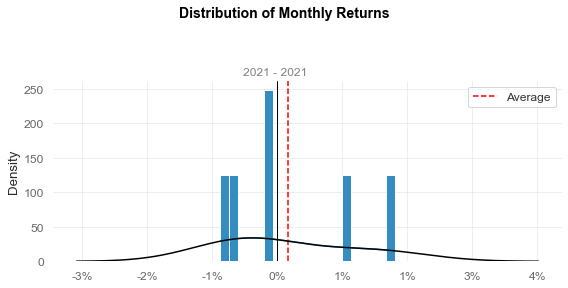

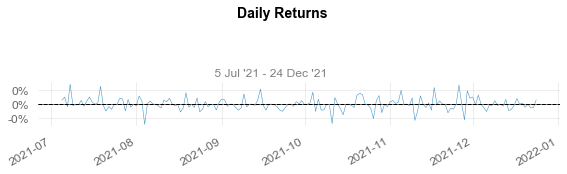

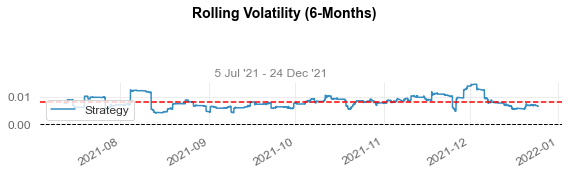

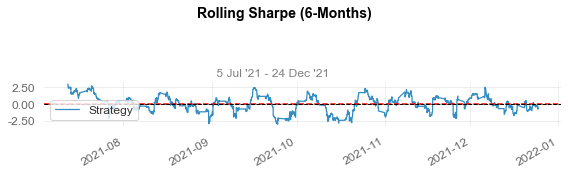

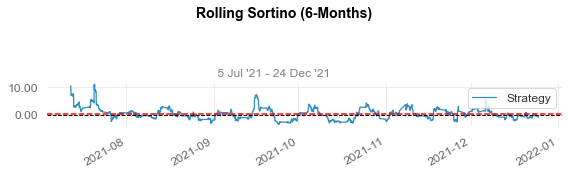

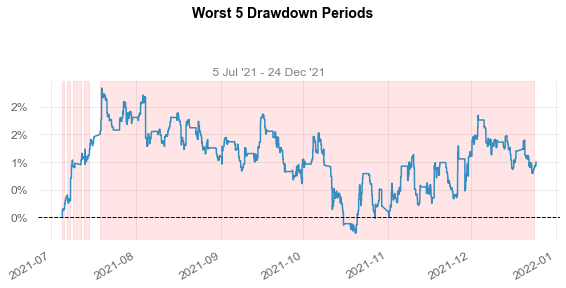

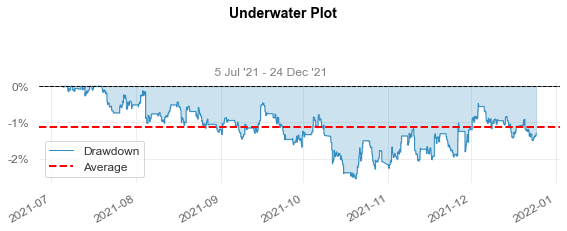

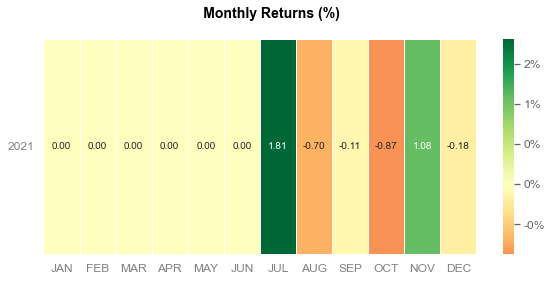

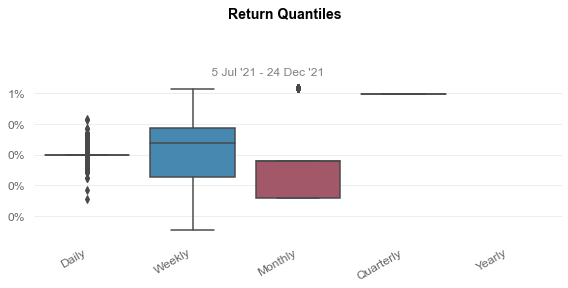

In [36]:
qs.reports.full(top_performance[names[6]]['iter_1_A2C_MlpLstmPolicy'])